# 强化学习2：马尔科夫决策过程 Markov Decision Process

- 马尔科夫性: 未来只受现在影响, 与过去无关。
    $$
    p\left(s_{t+1} \mid s_1, s_2, \ldots, s_t\right)=p\left(s_{t+1} \mid s_t\right)
    $$

  - 当前状态包含了历史所有能影响未来的信息。

- 马尔科夫过程：满足马尔科夫性的随机过程。

- 如果状态数目有限 (分立), 则可用状态转移矩阵描述:
  $$
  p\left(s_{t+1} \mid s_t\right)=p\left(s^{\prime} \mid s\right)=\left[\begin{array}{ccc}
  P_{11} & \cdots & P_{1 n} \\
  \vdots & \ddots & \vdots \\
  P_{n 1} & \cdots & P_{n n}
  \end{array}\right]
  $$
  - 行（号）：转移前状态
  - 列（号）：转移后状态

- 满足 $\sum_{j=1}^n P_{i j}=1$



### 有限马尔科夫决策过程

- Finite Markov decision process (MDP)

- 动力学行为决定于概率 $p\left(s^{\prime}, r \mid s, a\right)$

  - 在前面的多臂老虎机问题中, 我们考虑行动 $a$ 的价值 $q_*(a)$, 而在MDPs中我们同时考虑状态 $s$ 与行动 $a$ 的影响 $q_*(s, a)$

  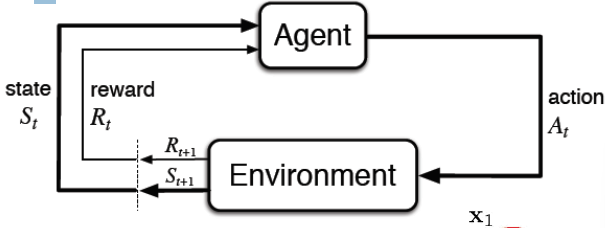

基于 $p\left(s^{\prime}, r \mid s, a\right)$, 可计算其它的一些重要量: 

- 状态转移概率
$$
p\left(s^{\prime} \mid s, a\right)=\sum_{r \in \mathcal{R}} p\left(s^{\prime}, r \mid s, a\right)
$$

- 状态-行动的回报期望值
$$
r(s, a)=\sum_{r \in \mathcal{R}, s^{\prime} \in \mathcal{S}} r p\left(s^{\prime}, r \mid s, a\right)
$$
- 状态-行动-后继状态的回报期望值
$$
r\left(s, a, s^{\prime}\right)=\sum_{r \in \mathcal{R}} r p\left(r \mid s, a, s^{\prime}\right)=\sum_{r \in \mathcal{R}} r \frac{p\left(s^{\prime}, r \mid s, a\right)}{p\left(s^{\prime} \mid s, a\right)}
$$

MDP框架把目标导向行为的强化学习概括成智能体与环境之间来回传递的三种信号:
- 一个信号用来表示智能体做出的选择（行动） $a$;

- 一个信号表示做出该选择的基础（状态） $S$;

- 还有一个信号定义了智能体的目标（回报）r。

### 目标函数 Goal

- 在 $t$ 时刻的决策目标, 是使之后接收的回报最大化。在最简单的情况下，定义目标函数（Goal，有时称为return）
    $$
    G_t \doteq R_{t+1}+R_{t+2}+R_{t+3}+\cdots+R_T
    $$

    - 其中 $T$ 是终止时刻。这适合回合制（分幕制，episodes）的任务

- 有时候涉及无穷长时间的任务, 此时一般引入贬值（折扣、贴现）的观点, 定义
$$
G_t \doteq R_{t+1}+\gamma R_{t+2}+\gamma^2 R_{t+3}+\cdots=\sum_{k=0}^{\infty} \gamma^k R_{t+k+1}
$$

- 合起来, 可写成: $G_t \doteq \sum_{k=t+1}^T \gamma^{k-t-1} R_k$

  - 满足
$$
G_t=R_{t+1}+\gamma G_{t+1}
$$

### 策略（policy）与价值（value）函数

- 策略函数给出了当状态为 $s$ 时采取行动 $a$ 的概率:
$$
\pi(a \mid s)
$$

- 状态 $s$ 在策略 $\pi$ 下的价值函数是其最后达到目标的期望值
    $$
    v_\pi(s) \doteq \mathbb{E}_\pi\left[G_t \mid S_t=s\right]
    $$
    - 称为策略 $\pi$ 的状态价值函数（state-value function）。
    
    
- 类似地, 在策略 $\pi$ 下对状态 $s$ 采取行动 $a$ 的价值函数是
    $$
    q_\pi(s, a) \doteq \mathbb{E}_\pi\left[G_t \mid S_t=s, A_t=a\right]
    $$

    - 先遵循策略 $\pi$ 选择行动 $a$, 再遵循策略 $\pi$ 选择行动 

    - 称为策略 $\pi$ 的行动价值函数（action-value function）。

- 因此 $v_\pi(s)=\sum_a q_\pi(s, a) \pi(a \mid s)$

### 贝尔曼（Bellman）方程

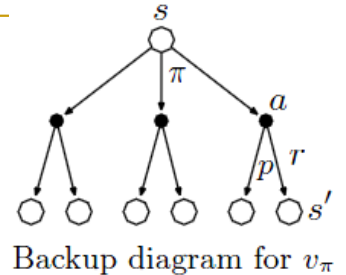

$$
\begin{aligned}
v_\pi(s) & \doteq \mathbb{E}_\pi\left[G_t \mid S_t=s\right] \\
& =\mathbb{E}_\pi\left[R_{t+1}+\gamma G_{t+1} \mid S_t=s\right] \\
& =\sum_a \pi(a \mid s) \sum_{s^{\prime}, r} p\left(s^{\prime}, r \mid s, a\right)\left[r+\gamma \mathbb{E}_\pi\left[G_{t+1} \mid S_{t+1}=s^{\prime}\right]\right] \\
& =\sum_a \pi(a \mid s) \sum_{s^{\prime}, r} p\left(s^{\prime}, r \mid s, a\right)\left[r+\gamma v_\pi\left(s^{\prime}\right)\right]
\end{aligned}
$$


- 线性方程组。它可以基于 $p\left(s^{\prime}, r \mid s, a\right)$ 与 $\pi(a \mid s)$ 求出 $v_\pi(s)$
- 构成了很多策略学习算法的理论基础。

### 回溯图（backup diagram）

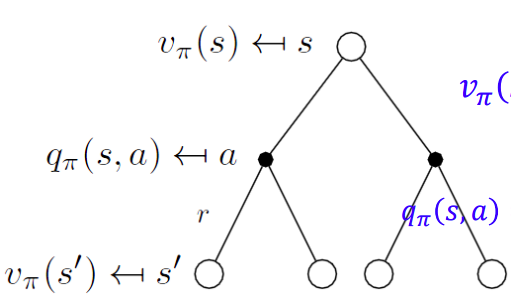

$$
\begin{aligned}
v_\pi(s)&=\sum_a q_\pi(s, a) \pi(a \mid s) \\
q_\pi(s, a)&=\sum_{s^{\prime}, r} p\left(s^{\prime}, r \mid s, a\right)\left[r+\gamma v_\pi\left(s^{\prime}\right)\right] \\
v_\pi(s)&=\sum_a \pi(a \mid s) \sum_{s^{\prime}, r} p\left(s^{\prime}, r \mid s, a\right)\left[r+\gamma v_\pi\left(s^{\prime}\right)\right]
\end{aligned}
$$



### 最优策略（optimal policy）

- 在所有策略中, 总存在一个 (或一组) 最优策略 $\pi^*$, 其状态价值函数记为 $v_*(s)$ ，其行动价值函数记为 $q_*(s, a)$ 。最优策略下的一个状态的价值一定   
    - 等于这个状态下最优动作的价值:
$$
\begin{aligned}
v_*(s) & =\max _a q_{\pi *}(s, a) \\
& =\max _a \mathbb{E}_{\pi *}\left[G_t \mid S_t=s, A_t=a\right] \\
& =\max _a \mathbb{E}_{\pi *}\left[R_{t+1}+\gamma G_{t+1} \mid S_t=s, A_t=a\right] \\
& =\max _a \mathbb{E}_{\pi *}\left[R_{t+1}+\gamma v_*\left(S_{t+1}\right) \mid S_t=s, A_t=a\right] \\
& =\max _a p\left(s^{\prime}, r \mid s, a\right)\left[r+\gamma v_*\left(s^{\prime}\right)\right]^{-}
\end{aligned}
$$

- 最优策略下的状态价值函数满足**贝尔曼最优方程（Bellman optimality equation）**:

- 类似地, 可以得到关于行动价值函数的贝尔曼最优方程
$$
q_*(s, a)=\sum_{s^{\prime}, r} p\left(s^{\prime}, r \mid s, a\right)\left[r+\gamma \max _{a^{\prime}} q_*\left(s^{\prime}, a^{\prime}\right)\right]
$$

- 原则上可以基于贝尔曼最优方程求解 $v_*(s)$ 与 $q_*(s, a)$ 。 
    - $v_*(s)$ 与 $q_*(s, a)$ 包含了长期回报的信息。

- 如果 $v_*(s)$ 与 $q_*(s, a)$ 已经求得, 则（最优）决策变得非常容易, 只需要利用 $v_*(s)$ 往前搜索一步
$\left(\max _a \mathbb{E}_{\pi *}\left[R_{t+1}+\gamma v_*\left(S_{t+1}\right) \mid S_t=s, A_t=a\right]\right)$ 或直接最大化 $q_*(s, a)$ 即可

- 很多决策方法都可以看做是贝尔曼最优方程的近似求解

强化学习中的最优策略（Optimal Policy）和贝尔曼最优方程（Bellman Optimality Equation）都是基于马尔可夫决策过程（Markov Decision Process，MDP）的概念。为了详细介绍这些概念，我将首先简要解释 MDP，然后讨论最优策略和贝尔曼最优方程。

### 马尔可夫决策过程（MDP）

MDP 是一种用于描述环境在强化学习中的数学模型。MDP 由以下组成：

1. **状态集合 $ S $**：环境可能处于的所有状态。
2. **动作集合 $ A $**：代理（Agent）可执行的所有动作。
3. **转移概率 $ P(s_{t+1} | s_t, a_t) $**：在状态 $ s_t $ 下执行动作 $ a_t $ 后，转移到状态 $ s_{t+1} $ 的概率。
4. **奖励函数 $ R(s_t, a_t, s_{t+1}) $**：执行动作 $ a_t $ 并从状态 $ s_t $ 转移到 $ s_{t+1} $ 时获得的即时奖励。
5. **折扣因子 $ \gamma $**：用于折现未来奖励的因子，范围在 0 到 1 之间。

### 最优策略（Optimal Policy）

在 MDP 中，策略 $ \pi(a|s) $ 定义了在给定状态 $ s $ 下选择动作 $ a $ 的概率。最优策略 $ \pi^* $ 是使得从任何初始状态开始，预期的累积折现奖励最大化的策略。数学上，最优策略可以表示为：

$$ \pi^* = \arg\max_{\pi} \mathbb{E} \left[ \sum_{t=0}^{\infty} \gamma^t R(s_t, a_t, s_{t+1}) \mid \pi \right] $$

这意味着最优策略在每个状态下都选择使得预期未来奖励最大化的动作。

### 贝尔曼最优方程（Bellman Optimality Equation）

贝尔曼最优方程提供了一种递归的方式来计算最优策略。它分为两部分：最优状态值函数 $ V^*(s) $ 和最优动作值函数 $ Q^*(s, a) $。

1. **最优状态值函数 $ V^*(s) $**: 在状态 $ s $ 下，遵循最优策略的预期返回值。它的贝尔曼最优方程为：

   $$ V^*(s) = \max_{a} \sum_{s'} P(s' | s, a) [R(s, a, s') + \gamma V^*(s')] $$

   这意味着在状态 $ s $ 下，最优状态值是对所有可能的后续状态 $ s' $ 的预期值（即时奖励加上折现后的未来奖励）的最大值。

2. **最优动作值函数 $ Q^*(s, a) $**: 在状态 $ s $ 下执行动作 $ a $ 并遵循最优策略的预期返回值。其贝尔曼最优方程为：

   $$ Q^*(s, a) = \sum_{s'} P(s' | s, a) [R(s, a, s') + \gamma \max_{a'} Q^*(s', a')] $$

   这表示在状态 $ s $ 下执行动作 $ a $ 的最优动作值是对所有可能的后续状态 $ s' $ 的预期值（即时奖励加上执行后续最优动作得

到的折现后的未来奖励）的总和。

### 结论

强化学习中的最优策略和贝尔曼最优方程为解决复杂的决策问题提供了一个强大的框架。这些概念不仅帮助我们理解如何计算最优策略，还是设计高效强化学习算法（如 Q-Learning 和 Value Iteration）的基础。通过这些方法，代理可以学习在复杂的、不确定的环境中做出最优决策。

在强化学习中，"网格世界"（Grid World）是一个经典的示例，用于展示最优策略和价值函数的概念。在这个环境中，代理（Agent）需要在一个由格子组成的世界中移动，目标是找到从起始点到终点的最优路径。我们可以使用价值迭代（Value Iteration）算法来找到这个网格世界中的最优策略和价值函数。

价值迭代是一种基于贝尔曼最优方程的算法，它逐步更新状态值函数 \( V(s) \) 直到收敛，然后基于 \( V(s) \) 导出最优策略。

### 网格世界示例

假设有一个简单的网格世界，如下所示：

- 代理可以向上、下、左、右移动。
- 某些格子可能是障碍物，代理不能进入。
- 存在一个目标状态，一旦代理到达该状态，游戏结束，并获得奖励。
- 其他移动会得到较小的负奖励，鼓励代理尽快到达目标。

### 实现

1. **初始化**：创建网格世界，定义转移概率、奖励和所有状态的初始价值函数。

2. **价值迭代**：对每个状态，计算执行所有可能动作后的预期价值，并更新状态的价值函数。

3. **导出最优策略**：根据最终的价值函数，为每个状态选择预期回报最高的动作作为最优策略。

4. **可视化**：展示价值函数和最优策略。

下面是这个过程的代码实现：

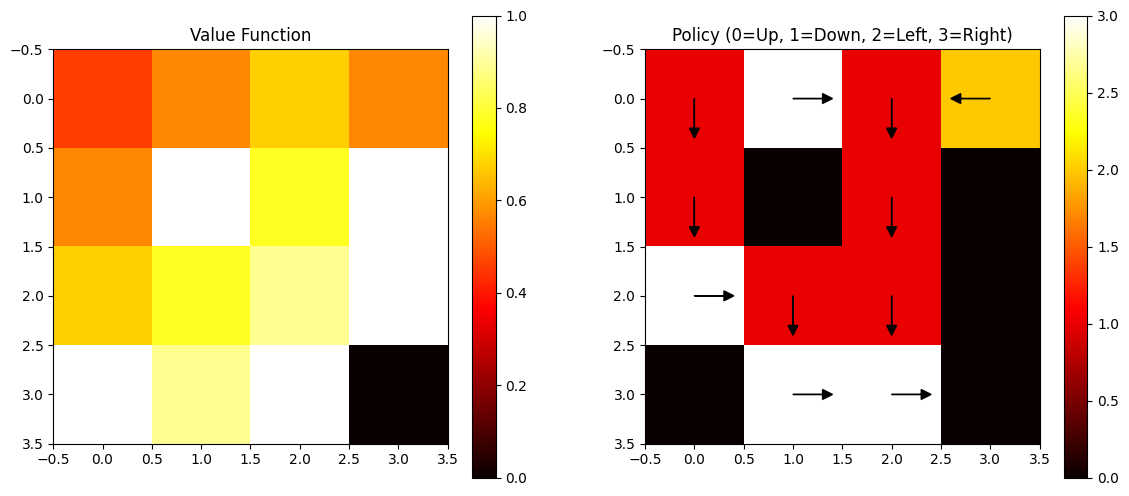

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def value_iteration(states, actions, transition_probabilities, rewards, gamma, threshold):
    V = np.zeros(len(states))
    policy = np.zeros(len(states), dtype=int)
    while True:
        V_prev = np.copy(V)
        for s in states:
            V[s] = max([sum([transition_probabilities[s][a][s_next] * (rewards[s][a][s_next] + gamma * V_prev[s_next]) 
                            for s_next in states]) for a in actions])
        if np.max(np.abs(V - V_prev)) < threshold:
            break
    for s in states:
        policy[s] = np.argmax([sum([transition_probabilities[s][a][s_next] * (rewards[s][a][s_next] + gamma * V_prev[s_next]) 
                            for s_next in states]) for a in actions])
    return V, policy

# 定义网格世界的参数
states = np.arange(16)  # 4x4 网格
actions = [0, 1, 2, 3]  # 上、下、左、右
gamma = 0.99  # 折扣因子
threshold = 0.001  # 收敛阈值
goal_state = 15  # 目标状态
obstacles = [5, 7, 11, 12]  # 障碍物位置

# 初始化奖励和转移概率
rewards = np.full((16, 4, 16), -0.1)  # 默认奖励
transition_probabilities = np.zeros((16, 4, 16))  # 转移概率

# 填充转移概率和奖励
for s in states:
    if s in obstacles or s == goal_state:
        continue
    for a in actions:
        next_state = s
        if a == 0 and s >= 4:  # 上
            next_state = s - 4
        elif a == 1 and s < 12:  # 下
            next_state = s + 4
        elif a == 2 and s % 4 > 0:  # 左
            next_state = s - 1
        elif a == 3 and s % 4 < 3:  # 右
            next_state = s + 1

        if next_state in obstacles:
            next_state = s  # 如果下一个状态是障碍物，保持原地

        transition_probabilities[s][a][next_state] = 1

# 设置目标状态的奖励
rewards[:, :, goal_state] = 1

# 执行价值迭代
V, policy = value_iteration(states, actions, transition_probabilities, rewards, gamma, threshold)

# 可视化价值函数和策略
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
V_grid = V.reshape(4,4)
for obs in obstacles:
    V_grid[obs // 4, obs % 4] = None  # 将障碍物位置置为空
plt.imshow(V_grid, cmap='hot', interpolation='nearest')
plt.title('Value Function')
plt.colorbar()

plt.subplot(1, 2, 2)
policy_grid = policy.reshape(4,4)
for obs in obstacles:
    V_grid[obs // 4, obs % 4] = None  # 将障碍物位置置为空
plt.imshow(policy_grid, cmap='hot', interpolation='nearest')
plt.title('Policy (0=Up, 1=Down, 2=Left, 3=Right)')
plt.colorbar()

# 在策略图上添加箭头表示动作方向
# 在策略图上添加箭头表示动作方向
for y in range(4):
    for x in range(4):
        pos = 4 * y + x
        if pos in obstacles or pos == goal_state:
            continue
        action = policy[pos]
        if action == 0:  # 上
            plt.arrow(x, y, 0, -0.3, head_width=0.1, head_length=0.1, fc='k', ec='k')
        elif action == 1:  # 下
            plt.arrow(x, y, 0, 0.3, head_width=0.1, head_length=0.1, fc='k', ec='k')
        elif action == 2:  # 左
            plt.arrow(x, y, -0.3, 0, head_width=0.1, head_length=0.1, fc='k', ec='k')
        elif action == 3:  # 右
            plt.arrow(x, y, 0.3, 0, head_width=0.1, head_length=0.1, fc='k', ec='k')

plt.show()


在这个代码中，我们需要根据具体的网格世界环境定义转移概率和奖励。例如，当代理试图移动到网格边界外或障碍物时，它应该保持在原地，并可能得到一些负奖励。在完成价值迭代后，我们可视化了最终的价值函数和最优策略。

### 注意

- 由于当前环境中无法直接运行绘图代码，您需要在自己的 Python 环境中运行这段代码。
- 代码中的 `transition_probabilities` 和 `rewards` 需要根据具体的网格世界环境进行填充。在实际应用中，这些参数通常反映了环境的动态特性和代理的目标。

## 小结
- 有限马尔科夫决策过程
  - 体系状态 $s$ 与行动 $a$ 的可能取值是有限（分立）的;
  - 下一状态与回报只决定于当前状态及行动: $p\left(s^{\prime}, r \mid s, a\right)$ 。
- 目标函数 (goal, return) : $G_t \doteq \sum_{k=t+1}^T \gamma^{k-t-1} R_k$
- 策略: 当状态为 $s$ 时采取行动 $a$ 的概率, $\pi(a \mid s)$
- 价值函数: 状态 $s$ （及行动 $a$ ) 在策略 $\pi$ 下的最后达到目标的期望值
- 贝尔曼方程: $v_\pi(s)=\sum_a \pi(a \mid s) \sum_{s^{\prime}, r} p\left(s^{\prime}, r \mid s, a\right)\left[r+\gamma v_\pi\left(s^{\prime}\right)\right]$

- 最优策略与最优方程: 
$$
v_*(s)=\max _a \sum_{s^{\prime}, r} p\left(s^{\prime}, r \mid s, a\right)\left[r+\gamma v_*\left(s^{\prime}\right)\right]
$$